# Forecast check-ins at Caesars Palace Casino

# Training the model using Facebook's Prophet

### Import packages

In [1]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px

### Read input data

In [2]:
train = pd.read_csv("../input/casino-checkin/Caesars_train.csv")

In [3]:
train.head()

,Date,checkins,1st of Month,15th of Month,JewishHoliday,CNY15Days,CNY7Days,CNY,SuperBowl,Valentines,...,2010,2011,2012,Casino,SE,Seg 0-3,FIT,WS,Group,FIT ADR
0,1/1/10,650,1,0,0,0,0,0,0,0,...,1,0,0,2207,804,1570,728,281,11,164.24
1,1/2/10,1028,0,0,0,0,0,0,0,0,...,1,0,0,1811,553,1022,869,273,13,162.38
2,1/3/10,944,0,0,0,0,0,0,0,0,...,1,0,0,1252,349,487,997,288,48,174.67
3,1/4/10,1086,0,0,0,0,0,0,0,0,...,1,0,0,885,269,279,1078,316,123,160.41
4,1/5/10,1071,0,0,0,0,0,0,0,0,...,1,0,0,721,164,211,1224,263,341,118.56


### Missing values in dataset
There are no missing values in the dataset

In [4]:
train.isnull().sum()

Date             0
checkins         0
1st of Month     0
15th of Month    0
JewishHoliday    0
CNY15Days        0
CNY7Days         0
CNY              0
SuperBowl        0
Valentines       0
Holloween        0
NY               0
MLK              0
Pres Day         0
Easter           0
Memorial         0
MotherDay        0
FatherDay        0
July 4th         0
LaborDay         0
ColumbusDay      0
VeteransDay      0
ThxGiving        0
Xmas             0
LongWKend        0
Jan              0
Feb              0
Mar              0
Apr              0
May              0
Jun              0
Jul              0
Aug              0
Sep              0
Oct              0
Nov              0
Sun              0
Mon              0
Tue              0
Wed              0
Thu              0
Fri              0
2010             0
2011             0
2012             0
Casino           0
SE               0
Seg 0-3          0
FIT              0
WS               0
Group            0
FIT ADR          0
dtype: int64

### Convert Date column from string to timedata

In [5]:
train['Date']=pd.to_datetime(train['Date'])

In [6]:
train['month'] = pd.DatetimeIndex(train['Date']).month

In [7]:
fig = px.line(train, x='Date', y='checkins', title='CheckIns')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=4, label="4y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [8]:
fig = px.line(train, x='Date', y='checkins', hover_data=['Casino'], title='Casino')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=4, label="4y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [9]:


fig = px.line(train, x='Date', y='checkins', hover_data=['SE'], title='SE')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=4, label="4y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()



In [10]:
fig = px.line(train, x='Date', y='checkins', hover_data=['Seg 0-3'], title='Seg 0-3')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=4, label="4y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [11]:
fig = px.line(train, x='Date', y='checkins', hover_data=['FIT'], title='FIT')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=4, label="4y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [12]:
fig = px.line(train, x='Date', y='checkins', hover_data=['WS'], title='WS')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=4, label="4y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [13]:
fig = px.line(train, x='Date', y='checkins', hover_data=['Group'], title='Group')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=4, label="4y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [14]:
fig = px.line(train, x='Date', y='checkins', hover_data=['FIT ADR'], title='FIT ADR')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=4, label="4y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [15]:
fig = px.line(train, x='Date', y='checkins', hover_data=['FIT','FIT ADR'], title='FIR Vs FIT ADR')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(count=3, label="3y", step="year", stepmode="backward"),
            dict(count=4, label="4y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

### Monthly distribution of check-in
From the below plot, we can observe that check-ins evenly distributed each month


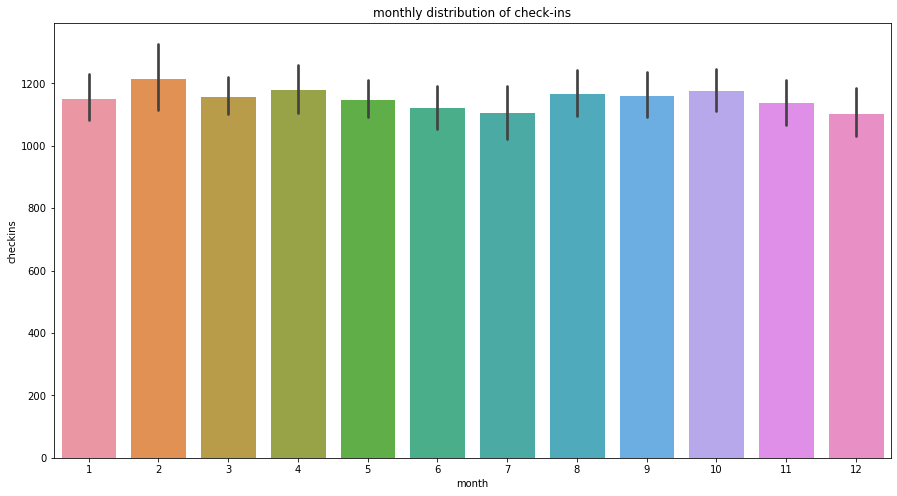

In [16]:
fig,ax=plt.subplots(figsize=(15,8))
sns.set_style('white')

sns.barplot(x='month',y='checkins',data=train[['month','checkins']],ax=ax)
ax.set_title('monthly distribution of check-ins')
plt.show()

In [17]:
train['year'] = pd.DatetimeIndex(train['Date']).year

### Yearly distribution of check-ins

From the below plot, we can observe that check-ins evenly distributed each year, except for 2013 as year-2013 contains data only for first 8 months

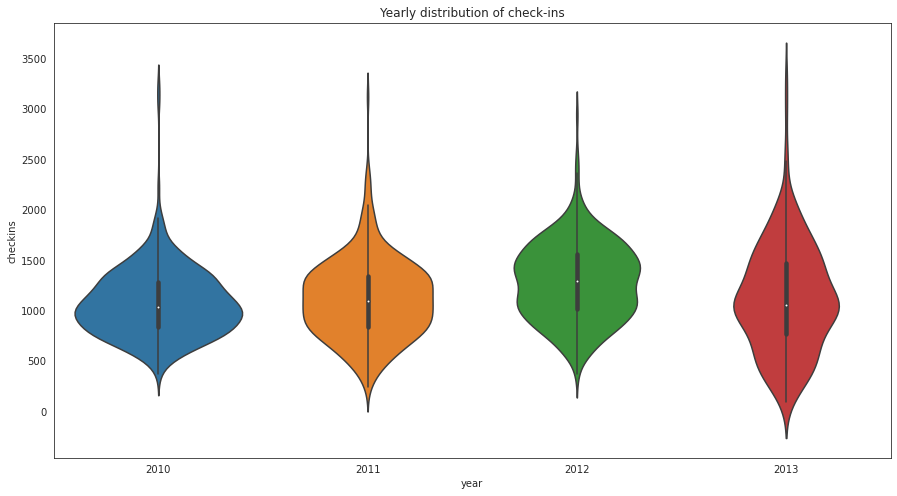

In [18]:
fig,ax=plt.subplots(figsize=(15,8))
sns.violinplot(x='year',y='checkins',data=train[['year','checkins']])
ax.set_title('Yearly distribution of check-ins')
plt.show()

### LongWKend distribution of check-ins
First 3 months of long weekends has more check-ins compared to non-long weekends.
No Long Weekend in the month of June and August

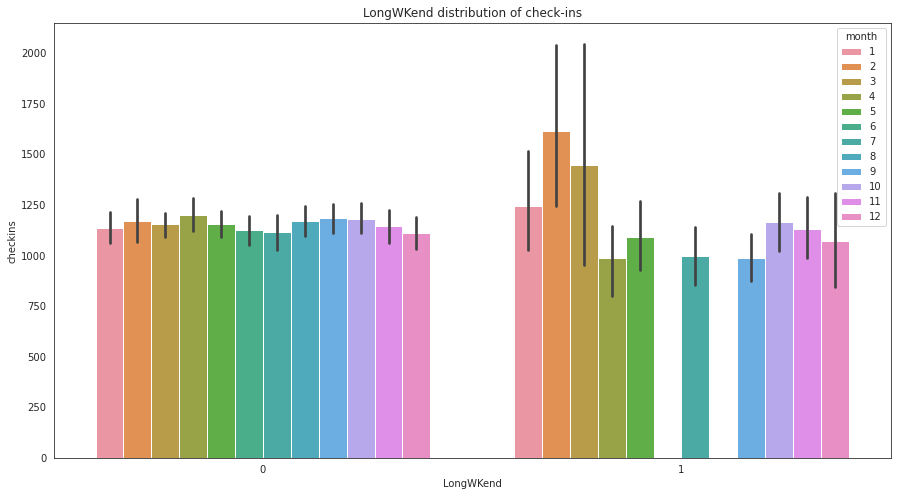

In [19]:
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=train,x='LongWKend',y='checkins',hue='month')
ax.set_title('LongWKend distribution of check-ins')
plt.show()

### Normal Probability Plot
Some target variable data points are deviates from normality at the extreme ends because of spikes in the time series data

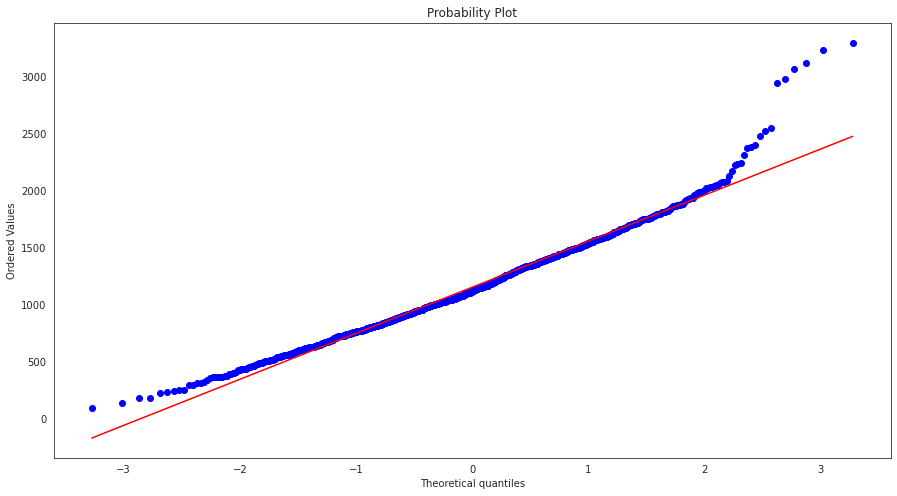

In [20]:
import scipy
from scipy import stats
fig=plt.figure(figsize=(15,8))
stats.probplot(train.checkins.tolist(),dist='norm',plot=plt)
plt.show()

### Correlation Matrix
From correlation plot, we can observed that some features are positively correlated or some are negatively correlated to each other. 
But none are highly correlated. FIT and FIT ADR are negatevily correlated. FIT and Group are positevily correlated

In [21]:
train.corr()

,checkins,1st of Month,15th of Month,JewishHoliday,CNY15Days,CNY7Days,CNY,SuperBowl,Valentines,Holloween,...,2012,Casino,SE,Seg 0-3,FIT,WS,Group,FIT ADR,month,year
checkins,1.000000,0.012892,0.065221,-0.016398,0.044638,5.184265e-02,0.015638,-0.043628,-0.044340,-0.030132,...,2.036828e-01,0.210432,0.170006,0.162603,0.124187,0.026080,-0.118305,-0.107095,-3.336941e-02,1.076582e-01
1st of Month,0.012892,1.000000,-0.030455,0.034510,-0.020088,-2.757310e-02,-0.010325,-0.010325,-0.010325,-0.008939,...,-4.426095e-03,0.042311,0.014418,0.056636,0.035937,0.036566,-0.058460,-0.042153,1.030971e-03,6.647635e-03
15th of Month,0.065221,-0.030455,1.000000,-0.037629,0.010824,4.225001e-02,-0.009041,-0.009041,-0.009041,-0.007827,...,-7.072727e-02,-0.015791,0.008681,-0.022262,-0.012477,0.003030,0.000854,-0.023954,-2.553389e-02,-2.785590e-02
JewishHoliday,-0.016398,0.034510,-0.037629,1.000000,-0.050062,-3.406755e-02,-0.012757,-0.012757,-0.012757,-0.011044,...,-1.294235e-01,0.093292,0.087910,0.098716,0.019113,0.110854,-0.127332,-0.056603,8.376764e-02,-9.816958e-02
CNY15Days,0.044638,-0.020088,0.010824,-0.050062,1.000000,6.805083e-01,0.254832,0.188117,0.121402,-0.010413,...,-1.406969e-02,-0.007508,0.056948,0.091506,-0.066238,-0.134062,0.094767,-0.017602,-2.859675e-01,3.069416e-02
CNY7Days,0.051843,-0.027573,0.042250,-0.034068,0.680508,1.000000e+00,0.374473,0.087479,0.183144,-0.007086,...,-1.096463e-02,0.008811,0.047306,0.093508,-0.110083,-0.125097,0.093045,-0.007478,-1.907177e-01,2.446673e-02
CNY,0.015638,-0.010325,-0.009041,-0.012757,0.254832,3.744728e-01,1.000000,-0.003065,0.247701,-0.002653,...,-4.105957e-03,0.005764,0.009936,0.073822,-0.012804,-0.025979,-0.011626,-0.045354,-7.141860e-02,9.162124e-03
SuperBowl,-0.043628,-0.010325,-0.009041,-0.012757,0.188117,8.747930e-02,-0.003065,1.000000,-0.003065,-0.002653,...,-4.105957e-03,0.120222,0.176226,0.160243,-0.082074,-0.091685,-0.005575,0.002873,-6.733067e-02,9.162124e-03
Valentines,-0.044340,-0.010325,-0.009041,-0.012757,0.121402,1.831438e-01,0.247701,-0.003065,1.000000,-0.002653,...,-4.105957e-03,-0.022765,-0.017382,-0.019408,-0.011803,-0.041234,0.041524,0.011038,-6.733067e-02,9.162124e-03
Holloween,-0.030132,-0.008939,-0.007827,-0.011044,-0.010413,-7.085875e-03,-0.002653,-0.002653,-0.002653,1.000000,...,5.308056e-03,-0.023069,-0.025219,-0.016926,0.001346,0.011896,0.010102,0.006674,5.495701e-02,-1.488699e-02


In [22]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import grangercausalitytests

In [23]:
result = adfuller(train['checkins'])
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
    print('Series is not Stationary')
else:
    print('Series is Stationary')

Test Statistics: -4.059733711810744
p-value: 0.0011280819655311413
Critial Values: {'1%': -3.435437251933509, '5%': -2.863786592704128, '10%': -2.567966103183712}
Series is Stationary


In [24]:
max_lags=4

In [25]:
results=grangercausalitytests(train[['checkins','Casino']], max_lags, verbose=False)

In [26]:
results

{1: ({'ssr_ftest': (37.50482044847924, 1.2046234050959243e-09, 1305.0, 1),
   'ssr_chi2test': (37.59103842652172, 8.724439185314244e-10, 1),
   'lrtest': (37.06099922970316, 1.1449092065666931e-09, 1),
   'params_ftest': (37.5048204484228, 1.204623405129798e-09, 1305.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (24.72231226493652, 2.897921497849158e-11, 1302.0, 2),
   'ssr_chi2test': (49.63450404035641, 1.6672640720262123e-11, 2),
   'lrtest': (48.71524737942673, 2.6400882198800636e-11, 2),
   'params_ftest': (24.722312264937038, 2.8979214978476343e-11, 1302.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (44.23286658392998, 3.230454296790174e-27, 1299.0, 3),
   'ssr_chi2test': (133.41368073582578, 9.93909820408248e-29, 3),
   'lrtest': (127.03048476433469, 2.3602287350074067e-27, 3),
   'params_ftest': (44.23286658392956, 3.230454296792217e-27, 1299.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0.,

In [27]:
p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

print('P Values per lag - '+str(p_values))

P Values per lag - [0.0, 0.0, 0.0, 0.0]


In [28]:
results=grangercausalitytests(train[['checkins','SE']], max_lags, verbose=False)
p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

print('P Values per lag - '+str(p_values))

P Values per lag - [0.0001, 0.0, 0.0, 0.0]


In [29]:
results=grangercausalitytests(train[['checkins','Seg 0-3']], max_lags, verbose=False)
p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

print('P Values per lag - '+str(p_values))

P Values per lag - [0.0, 0.0, 0.0, 0.0]


In [30]:
results=grangercausalitytests(train[['checkins','FIT']], max_lags, verbose=False)
p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

print('P Values per lag - '+str(p_values))

P Values per lag - [0.0, 0.0, 0.0, 0.0]


In [31]:
results=grangercausalitytests(train[['checkins','WS']], max_lags, verbose=False)
p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

print('P Values per lag - '+str(p_values))

P Values per lag - [0.1548, 0.001, 0.0004, 0.0]


In [32]:
results=grangercausalitytests(train[['checkins','Group']], max_lags, verbose=False)
p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

print('P Values per lag - '+str(p_values))

P Values per lag - [0.0, 0.0, 0.0, 0.0]


In [33]:
results=grangercausalitytests(train[['checkins','FIT ADR']], max_lags, verbose=False)
p_values=[round(results[i+1][0]['ssr_ftest'][1],4) for i in range(max_lags)]

print('P Values per lag - '+str(p_values))

P Values per lag - [0.0, 0.0001, 0.0, 0.0]


### 1st of Month Column:

1st of Month column is not concidered for model because:
* checkins Average values are same for both the categories
* Median values are almost same

In [34]:
train[['1st of Month','checkins']].groupby('1st of Month').agg({'checkins':{'max','min','mean'}})

checkins           
                     mean  min   max
1st of Month                        
0             1153.145455   98  3298
1             1182.363636  364  2069

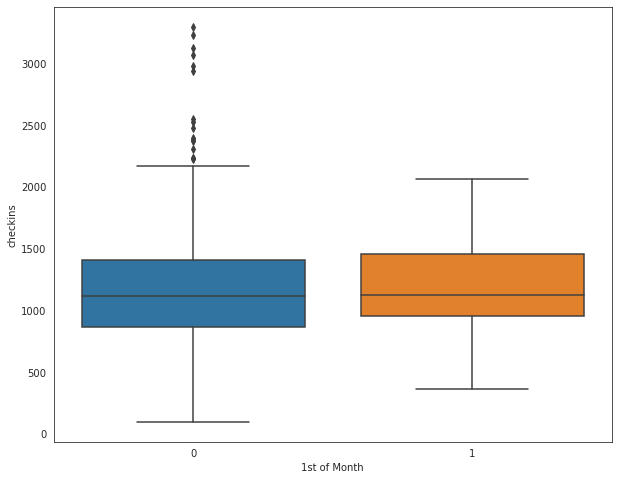

In [35]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="1st of Month", y="checkins", data=train)

In [36]:
train[['15th of Month','checkins']].groupby('15th of Month').agg({'checkins':{'max','min','mean'}})

checkins           
                      mean  min   max
15th of Month                        
0              1149.777255   98  3298
1              1317.264706  311  3232

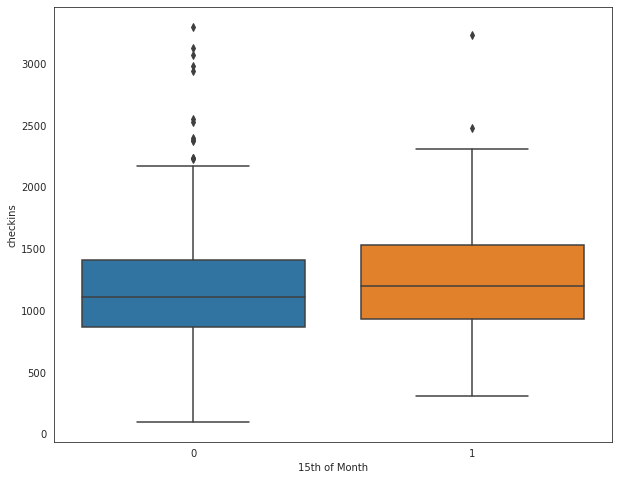

In [37]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="15th of Month", y="checkins", data=train)

In [38]:
train[['JewishHoliday','checkins']].groupby('JewishHoliday').agg({'checkins':{'max','min','mean'}})

checkins           
                      mean  min   max
JewishHoliday                        
0              1155.670957   98  3298
1              1125.060606  371  2381

### JewishHoliday Column:

JewishHoliday is not concidered for model because:
* checkins Average values are same for both the categories
* Median values are almost same

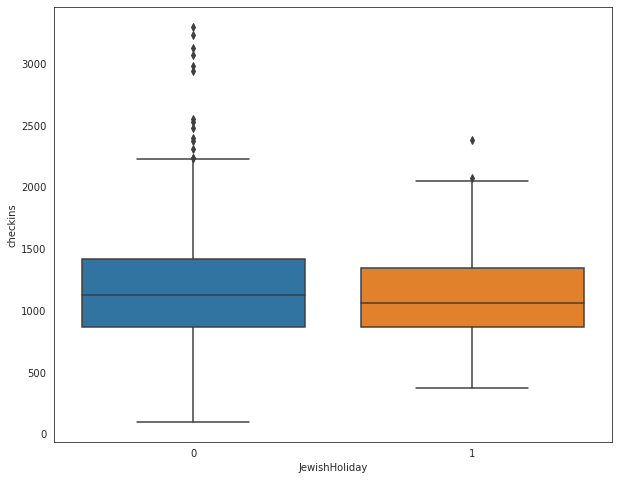

In [39]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="JewishHoliday", y="checkins", data=train)

In [40]:
train[['CNY15Days','checkins']].groupby('CNY15Days').agg({'checkins':{'max','min','mean'}})

checkins           
                  mean  min   max
CNY15Days                        
0          1150.166400   98  3067
1          1238.050847  228  3298

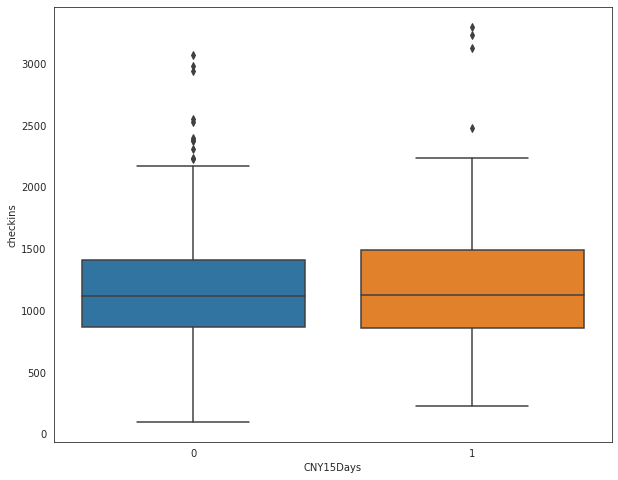

In [41]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="CNY15Days", y="checkins", data=train)

In [42]:
train[['CNY7Days','checkins']].groupby('CNY7Days').agg({'checkins':{'max','min','mean'}})

checkins           
                 mean  min   max
CNY7Days                        
0         1150.996877   98  3067
1         1297.357143  228  3298

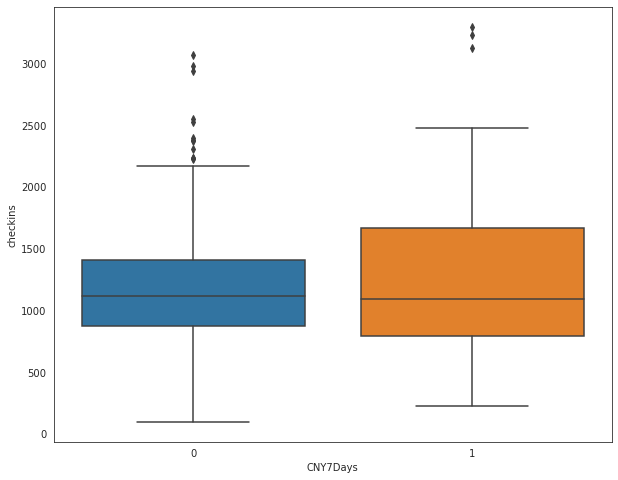

In [43]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="CNY7Days", y="checkins", data=train)

In [44]:
train[['MotherDay','checkins']].groupby('MotherDay').agg({'checkins':{'max','min','mean'}})

checkins            
                  mean   min   max
MotherDay                         
0          1153.386207    98  3298
1          1396.000000  1107  1639

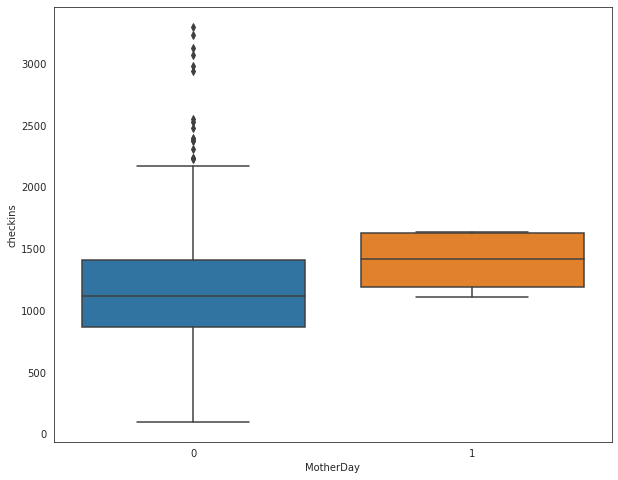

In [45]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="MotherDay", y="checkins", data=train)

In [46]:
train[['FatherDay','checkins']].groupby('FatherDay').agg({'checkins':{'max','min','mean'}})

checkins            
                  mean   min   max
FatherDay                         
0          1153.356322    98  3298
1          1405.750000  1286  1570

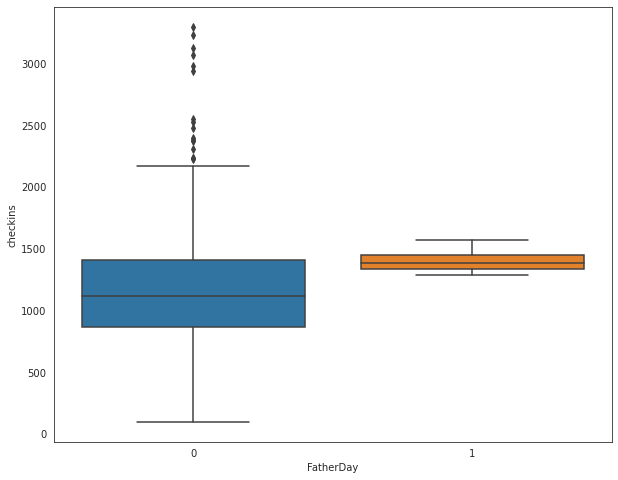

In [47]:
plt.figure(figsize=(10, 8))
sns.boxplot(x="FatherDay", y="checkins", data=train)

In [48]:
train = train.drop(["month","year"], axis=1)

In [49]:
#train = train.drop(["WS"], axis=1)

### Feature Engineering
* Created a new column "Seg 0-3_bins" with 4 cotegories values which are grouped based on the similar values and removed column "Seg 0-3" from the model because it is not giving much information about the model
* Created a new column "FIT_Ratio" as FIT and FIT ADR are negatively correlated. 
* Adding these variables improved model performance

In [50]:
train['Seg 0-3_bins'] = pd.cut(train['Seg 0-3'], bins=4, labels=False)
train['FIT_Ratio'] = train.apply(lambda row: row['FIT ADR'] / row['FIT'], axis=1)

### Renamed holiday column names
Renamed holiday column names with the same name as in the Facebook's prophet in built holiday list

In [51]:
train = train.rename({'SuperBowl': 'superbowl', 'NY': 'New Year\'s Day', 'MLK': 'Martin Luther King, Jr. Day',
                      'Memorial': 'Memorial Day', 'July 4th': 'Independence Day', 'LaborDay': 'Labor Day',
                      'ColumbusDay': 'Columbus Day', 'VeteransDay': 'Veterans Day', 'ThxGiving': 'Thanksgiving',
                      'Xmas': 'Christmas Day (Observed)'}, axis='columns')

### Renaming Target and Timestamp columns
Renamed Target and Timestamp columns "y" and "ds" respectevily because Prophet algorithm accept these parameter names

In [52]:
train_final=train[['Date','checkins', '15th of Month', 'CNY7Days','CNY', 
                   'Valentines', 'Holloween', 'Pres Day', 'Easter', 'LongWKend', 
                   'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Sun', 'Mon', 'Tue', 'Wed', 
                   'Thu', 'Fri', '2010', '2011', '2012', 'Casino', 'SE', 'FIT', 'WS','Group', 
                   'FIT ADR', 'Seg 0-3_bins', 'FIT_Ratio']].rename({'Date':'ds','checkins':'y','15th of Month': '15th of Month',
                                                                    'CNY7Days': 'CNY7Days','CNY': 'CNY',
                                       'Valentines': 'Valentines','Holloween': 'Holloween',
                                       'Pres Day': 'Pres Day','Easter': 'Easter',
                                       'MotherDay': 'MotherDay','FatherDay': 'FatherDay','LongWKend': 'LongWKend','Jan': 'Jan','Feb': 'Feb',
                                       'Mar': 'Mar','Apr': 'Apr','May': 'May','Jun': 'Jun','Jul': 'Jul','Aug': 'Aug','Sep': 'Sep',
                                       'Oct': 'Oct','Nov': 'Nov','Sun': 'Sun','Mon': 'Mon','Tue': 'Tue','Wed': 'Wed','Thu': 'Thu',
                                       'Fri': 'Fri','2010': '2010','2011': '2011','2012': '2012','Casino': 'Casino','SE': 'SE',
                                       'FIT': 'FIT','WS':'WS','Group': 'Group','FIT ADR': 'FIT ADR',
                                                      'Seg 0-3_bins':'Seg 0-3_bins','FIT_Ratio':'FIT_Ratio'}, 
                                      axis='columns')

### Cross-validation
Dividing the dataset into train and test to measure the model performance

In [53]:
train=train_final[(train_final['ds'] >= '2010-01-01') & (train_final['ds'] <= '2012-12-31')]
test=train_final[(train_final['ds'] > '2012-12-31')]

### Adding holiday list
* Created a new holiday (highercheckins) to learn spike in the target value for the month of Febraury and September

In [54]:
highercheckins = pd.DataFrame({
  'holiday': 'highercheckins',
  'ds': pd.to_datetime(['2013-02-15', '2012-02-15', '2011-02-15','2010-02-15', 
                       '2013-07-15', '2012-07-15', '2011-07-15','2010-07-15']),
  'lower_window': -15,
  'upper_window': 15,
})

CNY = pd.DataFrame({
  'holiday': 'CNY',
  'ds': pd.to_datetime(['2013-02-10', '2012-01-23','2011-02-03','2010-02-14']),
  'lower_window': 0,
  'upper_window': 1,
})

PresDay = pd.DataFrame({
  'holiday': 'Pres Day',
  'ds': pd.to_datetime(['2013-02-18', '2012-02-20','2011-02-21', '2010-02-25']),
  'lower_window': 0,
  'upper_window': 1,
})

Easter = pd.DataFrame({
  'holiday': 'Easter',
  'ds': pd.to_datetime(['2013-03-31', '2012-04-08', '2011-04-24','2010-04-04']),
  'lower_window': 0,
  'upper_window': 1,
})

MotherDay = pd.DataFrame({
  'holiday': 'MotherDay',
  'ds': pd.to_datetime([ '2013-05-12', '2012-05-13', '2011-05-08','2010-05-09']),
  'lower_window': 0,
  'upper_window': 1,
})
FatherDay = pd.DataFrame({
  'holiday': 'FatherDay',
  'ds': pd.to_datetime(['2013-06-16', '2012-06-17', '2011-06-19','2010-06-20' ]),
  'lower_window': 0,
  'upper_window': 1,
})

Valentines = pd.DataFrame({
  'holiday': 'Valentines',
  'ds': pd.to_datetime(['2013-02-14', '2012-02-14', '2011-02-14','2010-02-14']),
  'lower_window': 0,
  'upper_window': 1,
})
Holloween = pd.DataFrame({
  'holiday': 'Holloween',
  'ds': pd.to_datetime(['2013-10-31','2012-10-31','2011-10-31','2010-10-31']),
  'lower_window': 0,
  'upper_window': 1,
})


In [55]:
holidays = pd.concat((highercheckins,CNY, Valentines, Holloween, PresDay, Easter,MotherDay,FatherDay))

In [56]:
#m = Prophet(interval_width=0.95, weekly_seasonality=False, holidays = holidays)
m = Prophet(interval_width=0.95, yearly_seasonality=True, weekly_seasonality=True, 
            holidays=holidays, changepoint_prior_scale=2)
m.add_country_holidays(country_name='US')
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

In [57]:
m.add_regressor('15th of Month',standardize=False)
m.add_regressor('CNY7Days',standardize=False)
m.add_regressor('LongWKend',standardize=False)
m.add_regressor('Jan',standardize=False)
m.add_regressor('Feb',standardize=False)
m.add_regressor('Mar',standardize=False)
m.add_regressor('Apr',standardize=False)
m.add_regressor('May',standardize=False)
m.add_regressor('Jun',standardize=False)
m.add_regressor('Jul',standardize=False)
m.add_regressor('Aug',standardize=False)
m.add_regressor('Sep',standardize=False)
m.add_regressor('Oct',standardize=False)
m.add_regressor('Nov',standardize=False)
m.add_regressor('Sun',standardize=False)
m.add_regressor('Mon',standardize=False)
m.add_regressor('Tue',standardize=False)
m.add_regressor('Wed',standardize=False)
m.add_regressor('Thu',standardize=False)
m.add_regressor('Fri',standardize=False)
m.add_regressor('2010',standardize=False)
m.add_regressor('2011',standardize=False)
m.add_regressor('2012',standardize=False)
m.add_regressor('Casino',standardize=True)
m.add_regressor('SE',standardize=True)
#m.add_regressor('Seg 0-3',standardize=True)
m.add_regressor('FIT',standardize=True)
m.add_regressor('WS',standardize=True)
m.add_regressor('Group',standardize=True)
m.add_regressor('FIT ADR',standardize=True)
m.add_regressor('Seg 0-3_bins',standardize=False)
m.add_regressor('FIT_Ratio',standardize=False)

In [58]:
m.fit(train)

In [59]:
future = m.make_future_dataframe(periods=213)
future.tail()

,ds
1304,2013-07-28
1305,2013-07-29
1306,2013-07-30
1307,2013-07-31
1308,2013-08-01


In [60]:
future['15th of Month']=train_final['15th of Month']
future['CNY7Days']=train_final['CNY7Days']
future['LongWKend']=train_final['LongWKend']
future['Jan']=train_final['Jan']
future['Feb']=train_final['Feb']
future['Mar']=train_final['Mar']
future['Apr']=train_final['Apr']
future['May']=train_final['May']
future['Jun']=train_final['Jun']
future['Jul']=train_final['Jul']
future['Aug']=train_final['Aug']
future['Sep']=train_final['Sep']
future['Oct']=train_final['Oct']
future['Nov']=train_final['Nov']
future['Sun']=train_final['Sun']
future['Mon']=train_final['Mon']
future['Tue']=train_final['Tue']
future['Wed']=train_final['Wed']
future['Thu']=train_final['Thu']
future['Fri']=train_final['Fri']
future['2010']=train_final['2010']
future['2011']=train_final['2011']
future['2012']=train_final['2012']
future['Casino']=train_final['Casino']
future['SE']=train_final['SE']
#future['Seg 0-3']=train_final['Seg 0-3']
future['FIT']=train_final['FIT']
future['WS']=train_final['WS']
future['Group']=train_final['Group']
future['FIT ADR']=train_final['FIT ADR']
future['Seg 0-3_bins']=train_final['Seg 0-3_bins']
future['FIT_Ratio']=train_final['FIT_Ratio']

In [61]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1304,2013-07-28,1022.895946,507.120597,1572.701871
1305,2013-07-29,884.039883,358.047218,1379.391826
1306,2013-07-30,1068.342894,534.429559,1545.793425
1307,2013-07-31,658.762539,131.943823,1186.599612
1308,2013-08-01,1075.949934,540.646434,1583.026106


### Model Prediction
From the below plots, we can observe that:
* during training model learns the pattern from training set and most of the values fall within the 95% confidence interval
* Even with predicting the test data, it captures the pattern correctly

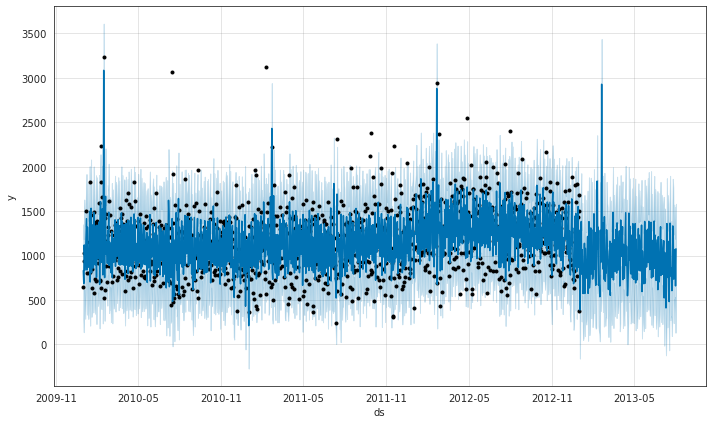

In [62]:
fig1 = m.plot(forecast)

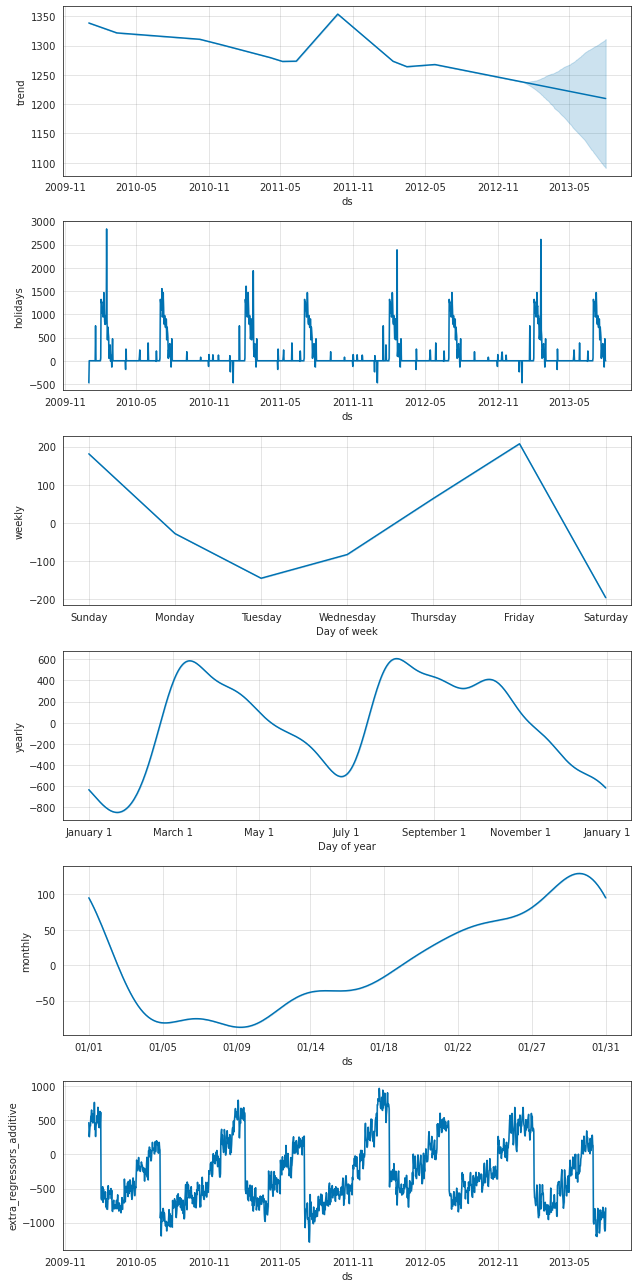

In [63]:
fig2 = m.plot_components(forecast)

### Model Performance
* RMSE value is around 266

In [64]:
metric_df = forecast.set_index('ds')[['yhat']].join(train.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
mse = mean_squared_error(metric_df.y, metric_df.yhat)
print("RMSE: ", np.sqrt(mse))

RMSE:  264.3821699452749


In [65]:
y_pred = metric_df.tail(213)

In [66]:
y_pred = y_pred.reset_index()

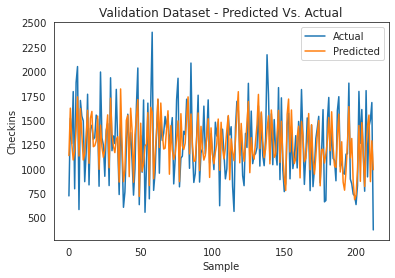

In [67]:
plt.plot(y_pred['y'], label='Actual')
plt.plot(y_pred['yhat'],label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Checkins')
plt.title('Validation Dataset - Predicted Vs. Actual')
plt.legend()
plt.show()

### Training Data Residuals
Over prediction and Under Prediction needs to be balanced. In our case there is a over prediction and needs to be addressed.

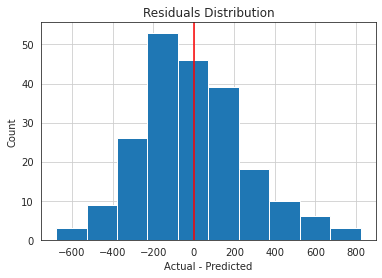

In [68]:
residuals = (y_pred['y'] - y_pred['yhat'])

plt.hist(residuals)
plt.grid(True)
plt.xlabel('Actual - Predicted')
plt.ylabel('Count')
plt.title('Residuals Distribution')
plt.axvline(color='r')
plt.show()